# Introduction

Notebook to aggregate the running of models in the context of traceability between **features** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import feat_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

features = fd.Datasets.read_features_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)


# Run All Models

## Intersec Strategy

In [2]:
exp_vol_intersec_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_2.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,26.37,70.59,38.4,0.0,1.0,Bug_Number 1248267 1248268 125...
1,lsi,top_1_cosine_0.1,26.37,70.59,38.4,0.1,1.0,Bug_Number 1248267 1248268 125...
2,lsi,top_1_cosine_0.2,26.37,70.59,38.4,0.2,1.0,Bug_Number 1248267 1248268 125...
3,lsi,top_1_cosine_0.3,26.37,70.59,38.4,0.3,1.0,Bug_Number 1248267 1248268 125...
4,lsi,top_1_cosine_0.4,26.37,70.59,38.4,0.4,1.0,Bug_Number 1248267 1248268 125...


In [4]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

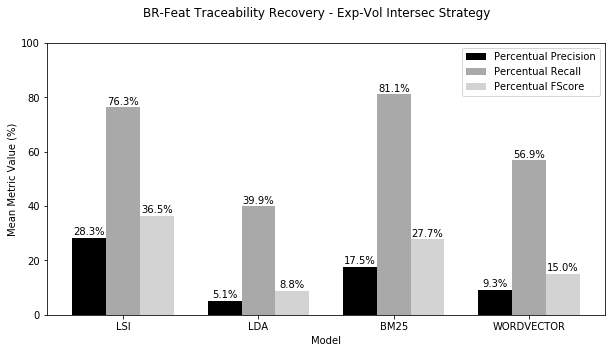

In [5]:
evaluator_2.plot_evaluations_3(evals_df_2_1, title='BR-Feat Traceability Recovery - Exp-Vol Intersec Strategy')

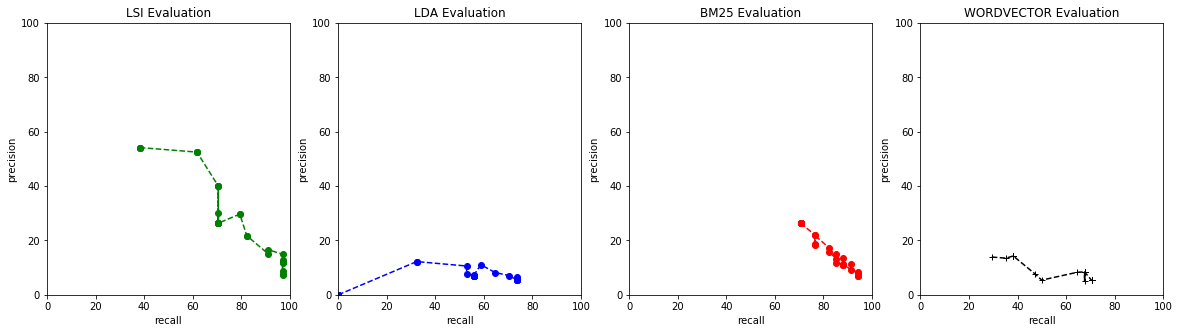

In [6]:
evaluator_2.plot_evaluations_4(evals_df_2_1)

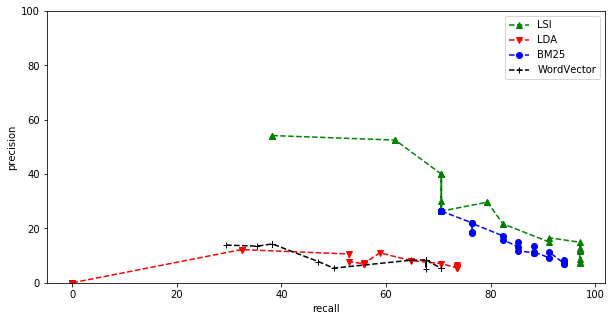

In [7]:
evaluator_2.plot_evaluations_5(evals_df_2_1)

### Oracle True Traces

In [8]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 34


### Retrieved Traces - Similarity Threshold 0.0

In [57]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[1,3,5], sim_threshs=[0.0])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall']].head(50)

,top,sim_thresh,model,TP_amount,FP_amount,FN_amount,precision,recall
0,1,0.0,lsi,24,67,10,26.37,70.59
3,1,0.0,lda,0,91,34,0.00,0.00
6,1,0.0,bm25,24,67,10,26.37,70.59
9,1,0.0,wordvector,13,78,21,14.29,38.24
1,3,0.0,lsi,33,240,1,12.09,97.06
4,3,0.0,lda,19,254,15,6.96,55.88
7,3,0.0,bm25,30,243,4,10.99,88.24
10,3,0.0,wordvector,23,250,11,8.42,67.65
2,5,0.0,lsi,33,422,1,7.25,97.06
5,5,0.0,lda,25,430,9,5.49,73.53


#### Traces Not Captured by Any Technique

In [58]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))

TOP 1 --------------------------
len(not_captured_traces): 7
percent not_captured_traces: 7/34 * 100 : 20.59%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1432915),
 ('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1352539),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 3 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


TOP 5 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


#### Traces Captured by Every Technique

In [59]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))

TOP 1 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/34 * 100 : 0.0%


TOP 3 -----------------------
len(traces_captured_by_all): 18
percent traces_captured_by_all: 18/34 * 100 : 52.94%


TOP 5 -----------------------
len(traces_captured_by_all): 23
percent traces_captured_by_all: 23/34 * 100 : 67.65%


#### True Positives Analysis

In [60]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [61]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, traces_type='TP', verbose=True)

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, traces_type='TP', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, traces_type='TP', verbose=True)

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

print()

df

TOP 1 ------------------------------
BM25 Exclusive TP:


{('new_awesome_bar', 1296366)}

len(bm25_exc_set): 1


LSI Exclusive TP:


{('downloads_dropmaker', 1292573), ('new_awesome_bar', 1297374)}

len(lsi_exc_set): 2


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


{('new_awesome_bar', 1297976)}

len(wv_exc_set): 1


TOP 3 ------------------------------
BM25 Exclusive TP:


{('downloads_dropmaker', 1432915)}

len(bm25_exc_set): 1


LSI Exclusive TP:


{('browser_customization', 1318903),
 ('downloads_dropmaker', 1292573),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}

len(lsi_exc_set): 4


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


set()

len(wv_exc_set): 0


TOP 5 -------------------------------
BM25 Exclusive TP:


{('downloads_dropmaker', 1432915)}

len(bm25_exc_set): 1


LSI Exclusive TP:


set()

len(lsi_exc_set): 0


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


set()

len(wv_exc_set): 0



,BM25,LSI,LDA,WordVector
TOP 1,1,2,0,1
TOP 3,1,4,0,0
TOP 5,1,0,0,0


#### False Positives Analysis

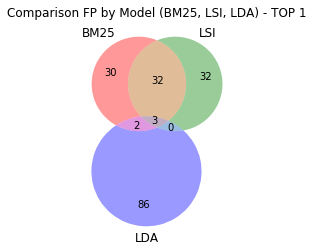

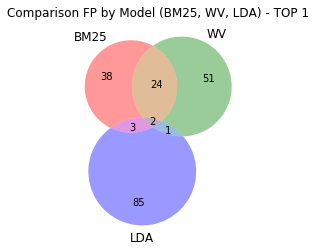

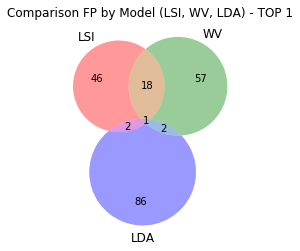

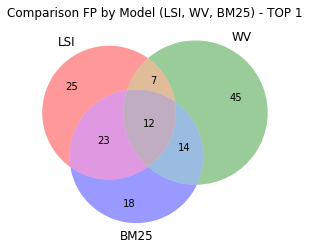

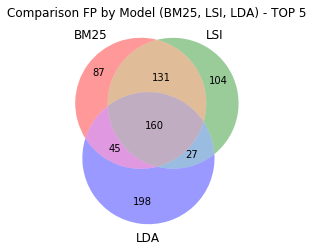

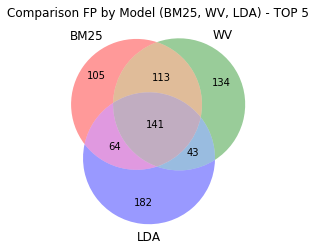

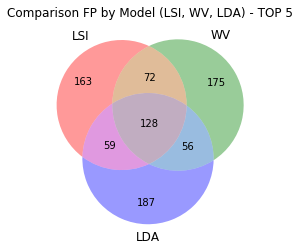

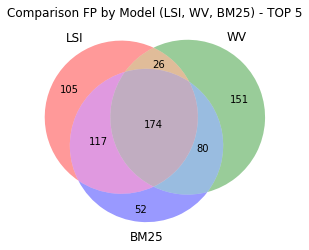

In [62]:
bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'FP')
bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'FP')

aux_functions.plot_venn_diagrams(1, bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(5, bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, 'FP')

##### Exclusive Traces

In [15]:
print("TOP 1 ------------------------------")
bm25_fp_exc_set_t1, lsi_fp_exc_set_t1, lda_fp_exc_set_t1, wv_fp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, traces_type='FP')

print("\n\nTOP 5 -------------------------------")
bm25_fp_exc_set_t5, lsi_fp_exc_set_t5, lda_fp_exc_set_t5, wv_fp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, traces_type='FP')

TOP 1 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 17


LSI Exclusive FP:
len(lsi_exc_set): 25


LDA Exclusive FP:
len(lda_exc_set): 85


WV Exclusive FP:
len(wv_exc_set): 44


TOP 5 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 33


LSI Exclusive FP:
len(lsi_exc_set): 91


LDA Exclusive FP:
len(lda_exc_set): 168


WV Exclusive FP:
len(wv_exc_set): 121


##### **LDA**

In [16]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix())

##### **LSI**

In [17]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix())

##### **BM25**

In [18]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

##### **Word Vector**

In [19]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.8616428384184254
Std Similarity Value: 0.05845638042856232


#### False Negatives Analysis

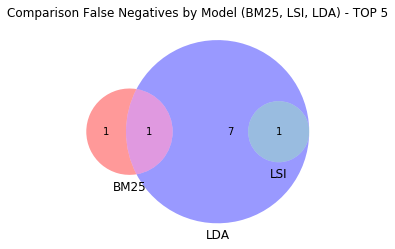

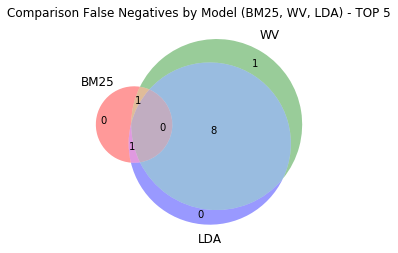

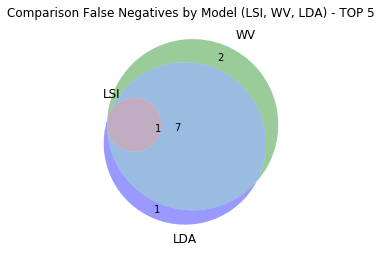

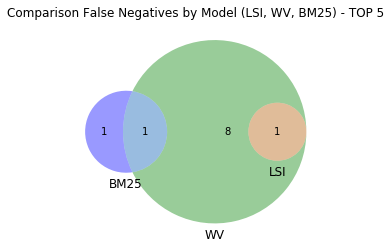

In [20]:
bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'FN')
bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'FN')

aux_functions.plot_venn_diagrams(5, bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, 'False Negatives')

##### Exclusive Traces

In [21]:
print("TOP 1 ------------------------------")
bm25_fn_exc_set_t1, lsi_fn_exc_set_t1, lda_fn_exc_set_t1, wv_fn_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, traces_type='FN')

print("\n\nTOP 5 -------------------------------")
bm25_fn_exc_set_t5, lsi_fn_exc_set_t5, lda_fn_exc_set_t5, wv_fn_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, traces_type='FN')

TOP 1 ------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 0


LSI Exclusive FN:
len(lsi_exc_set): 0


LDA Exclusive FN:
len(lda_exc_set): 11


WV Exclusive FN:
len(wv_exc_set): 0


TOP 5 -------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 0


LSI Exclusive FN:
len(lsi_exc_set): 0


LDA Exclusive FN:
len(lda_exc_set): 0


WV Exclusive FN:
len(wv_exc_set): 1


##### **LDA**

In [22]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

Topic #0: webgl firefox window compat page web open bar tab taskbar
Topic #1: loud speech read html extens text desktop content page use
Topic #2: element stop default http branch set code info forward field
Topic #3: capabl librari render browser firefox http branch element stop default
Topic #4: custom firefox default browser http branch element stop set appear
Topic #5: element stop default http branch set code info forward field
Topic #6: element stop default http branch set code info forward field
Topic #7: menu context option displayport portion apz new zoom pan gecko
Topic #8: download dropmak notif option display http branch element stop default
Topic #9: element stop default http branch set code info forward field
Topic #10: mous lock pointer movement cursor exampl game api rotat click
Topic #11: child certif mode connect account ssl present activ parent doe
Topic #12: indic zoom devic permiss valu need thi user notif default
Topic #13: reader mode firefox shown loud speech re

In [23]:
aux_functions.detail_features_br(lda_fn_exc_set_t1, features, bugreports)[['feat','br','br_summary']]

,feat,br,br_summary
0,new_awesome_bar,1334844,"Address bar uses most recently entered URL, not URL in bar, after using CTRL+ENTER"
1,new_awesome_bar,1353831,OneOff block in search bar doesn't update text if Customize was opened at least once
2,new_awesome_bar,1337682,using ctrl / shift + enter seems to save the URL to a hidden clipboard that populates when hitting enter (hard to describe).
3,new_awesome_bar,1294887,Middle clicking search results does not open a new tab
4,context_menu,1299458,Telemetry data from Search bar is not properly collected when searching in new tab from context menu
5,new_awesome_bar,1365887,Can't open resource:///modules/ from the location bar
6,context_menu,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu"
7,new_awesome_bar,1301421,browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word
8,new_awesome_bar,1335992,Search with default search engine stops working
9,new_awesome_bar,1279864,The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input


In [24]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1]])

Bug_Number,1334844,1353831,1337682,1294887,1299458,1365887,1248267,1301421,1335992,1279864,1270983
feat_name,,,,,,,,,,,
new_awesome_bar,0.994299,0.945485,0.965392,0.993985,0.93149,0.800213,0.819873,0.81112,0.952221,0.87502,0.876709
windows_child_mode,0.403396,0.504059,0.430215,0.451453,0.413517,0.380811,0.38372,0.425339,0.438368,0.431626,0.376782
apz_async_scrolling,0.0306721,0.100934,0.233028,0.0375015,0.324393,0.592938,0.555395,0.510611,0.0497479,0.42405,0.494621
browser_customization,0.0567898,0.300992,0.0635576,0.065498,0.0758315,0.147356,0.084284,0.0813945,0.226194,0.0738469,0.0838312
pdf_viewer,0.0668428,0.150401,0.194899,0.0560188,0.157623,0.192325,0.181913,0.352992,0.193736,0.306042,0.0720967
context_menu,0.391743,0.443445,0.573095,0.397656,0.643727,0.844958,0.817121,0.780128,0.400596,0.721338,0.776754
w10_comp,0.994476,0.946185,0.965769,0.994249,0.932101,0.801084,0.820732,0.81199,0.952873,0.875716,0.877382
tts_in_desktop,0.0378915,0.141716,0.0417733,0.0452432,0.0507462,0.0584014,0.0569175,0.0539073,0.0596751,0.0481993,0.058755
tts_in_rm,0.0380373,0.0547992,0.0419414,0.0453996,0.0509398,0.0586117,0.0571287,0.0541195,0.0598757,0.0483972,0.0589487


In [63]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1 - set([1270983,1248267,1299458])]])

Bug_Number,1334844,1353831,1337682,1294887,1299458,1365887,1248267,1301421,1335992,1279864,1270983
feat_name,,,,,,,,,,,
new_awesome_bar,0.994299,0.945485,0.965392,0.993985,0.93149,0.800213,0.819873,0.81112,0.952221,0.87502,0.876709
windows_child_mode,0.403396,0.504059,0.430215,0.451453,0.413517,0.380811,0.38372,0.425339,0.438368,0.431626,0.376782
apz_async_scrolling,0.0306721,0.100934,0.233028,0.0375015,0.324393,0.592938,0.555395,0.510611,0.0497479,0.42405,0.494621
browser_customization,0.0567898,0.300992,0.0635576,0.065498,0.0758315,0.147356,0.084284,0.0813945,0.226194,0.0738469,0.0838312
pdf_viewer,0.0668428,0.150401,0.194899,0.0560188,0.157623,0.192325,0.181913,0.352992,0.193736,0.306042,0.0720967
context_menu,0.391743,0.443445,0.573095,0.397656,0.643727,0.844958,0.817121,0.780128,0.400596,0.721338,0.776754
w10_comp,0.994476,0.946185,0.965769,0.994249,0.932101,0.801084,0.820732,0.81199,0.952873,0.875716,0.877382
tts_in_desktop,0.0378915,0.141716,0.0417733,0.0452432,0.0507462,0.0584014,0.0569175,0.0539073,0.0596751,0.0481993,0.058755
tts_in_rm,0.0380373,0.0547992,0.0419414,0.0453996,0.0509398,0.0586117,0.0571287,0.0541195,0.0598757,0.0483972,0.0589487


##### **LSI**

No exclusive False Negative traces for Top 1 and Top 5

##### **BM25**

No exclusive False Negative traces for Top 1 and Top 5

##### **Word Vector**

In [25]:
aux_functions.detail_features_br(wv_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']]

,feat,br,br_summary
0,downloads_dropmaker,1287384,Incorrect alignment of Summary section in Downloads panel


In [26]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t5]])

Bug_Number,1287384
feat_name,
new_awesome_bar,0.89762
windows_child_mode,0.899505
apz_async_scrolling,0.885475
browser_customization,0.773195
pdf_viewer,0.808473
context_menu,0.890064
w10_comp,0.879205
tts_in_desktop,0.882082
tts_in_rm,0.881948


#### REI Calculation - TOP 5

In [27]:
true_traces_amount = len(oracle_true_traces_inter)
top = 5
models = ['bm25','lsi','lda','wordvector']

for m in models:
    tp = retrieved_traces_df[(retrieved_traces_df.model == m) & (retrieved_traces_df.top == top)].iloc[0,:].TP_amount
    fp = retrieved_traces_df[(retrieved_traces_df.model == m) & (retrieved_traces_df.top == top)].iloc[0,:].FP_amount
    print('{} REI:  {:2.4}%'.format(m.upper(), tp / true_traces_amount * 100))

BM25 REI:  94.12%
LSI REI:  97.06%
LDA REI:  73.53%
WORDVECTOR REI:  70.59%


"The quantity _1 - REI_ can be used to estimate the effort saving due to the use of an IR method to recover traceability links, with respect to completely manual analysis. The lower the REI, the higher the benefits of the IR approach." (Antoniol. _et al._, 2002)

It is important to notice that this metric is independent of the technique, once it is used when the Recall value is 100%. 

#### Goodness Scale

In [28]:
aux_functions.calculate_goodness(evals_df_2_1)

,model,precision,recall,goodness
0,bm25,17.549000,81.079667,None
1,lsi,28.321000,76.275333,Acceptable
2,lda,5.084333,39.901333,None
3,wordvector,9.265000,56.865333,None


#### Delete Variables

### Retrieved Traces - Similarity Threshold 0.9

In [64]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[1,3,5], sim_threshs=[0.9])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall']].head(50)

,top,sim_thresh,model,TP_amount,FP_amount,FN_amount,precision,recall
0,1,0.9,lsi,13,11,21,54.17,38.24
3,1,0.9,lda,0,32,34,0.00,0.00
6,1,0.9,bm25,24,67,10,26.37,70.59
9,1,0.9,wordvector,10,62,24,13.89,29.41
1,3,0.9,lsi,13,11,21,54.17,38.24
4,3,0.9,lda,11,79,23,12.22,32.35
7,3,0.9,bm25,26,92,8,22.03,76.47
10,3,0.9,wordvector,16,189,18,7.80,47.06
2,5,0.9,lsi,13,11,21,54.17,38.24
5,5,0.9,lda,11,79,23,12.22,32.35


#### Traces Not Captured by Any Technique

In [69]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t3_inter)

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t5_inter)

TOP 1 --------------------------
len(not_captured_traces): 10
percent not_captured_traces: 10/34 * 100 : 29.41%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 1432915),
 ('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1297374),
 ('new_awesome_bar', 1297976),
 ('new_awesome_bar', 1352539),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 3 --------------------------
len(not_captured_traces): 6
percent not_captured_traces: 6/34 * 100 : 17.65%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 1432915),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 5 --------------------------
len(not_captured_traces): 5
percent not_captured_traces: 5/34 * 100 : 14.71%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 143291

#### Traces Captured by Every Technique

In [70]:
import pprint

print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t1_inter)

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t3_inter)

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t5_inter)

TOP 1 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/34 * 100 : 0.0%
set()


TOP 3 -----------------------
len(traces_captured_by_all): 5
percent traces_captured_by_all: 5/34 * 100 : 14.71%
{('new_awesome_bar', 1293308),
 ('new_awesome_bar', 1294733),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682)}


TOP 5 -----------------------
len(traces_captured_by_all): 5
percent traces_captured_by_all: 5/34 * 100 : 14.71%
{('new_awesome_bar', 1293308),
 ('new_awesome_bar', 1294733),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682)}


#### True Positives Analysis

In [67]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [68]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, traces_type='TP')

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, traces_type='TP')

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, traces_type='TP')

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

print()

df

TOP 1 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 8


LSI Exclusive TP:
len(lsi_exc_set): 0


LDA Exclusive TP:
len(lda_exc_set): 0


WV Exclusive TP:
len(wv_exc_set): 0


TOP 3 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 6


LSI Exclusive TP:
len(lsi_exc_set): 0


LDA Exclusive TP:
len(lda_exc_set): 0


WV Exclusive TP:
len(wv_exc_set): 2


TOP 5 -------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 6


LSI Exclusive TP:
len(lsi_exc_set): 0


LDA Exclusive TP:
len(lda_exc_set): 0


WV Exclusive TP:
len(wv_exc_set): 3



,BM25,LSI,LDA,WordVector
TOP 1,8,0,0,0
TOP 3,6,0,0,2
TOP 5,6,0,0,3


## Volunteers Only Strategy

In [ ]:
vol_strat_runner = feat_br_strat_runner.Feat_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_4.head()

In [ ]:
evals_df_4_1 = evals_df_4[evals_df_4.top != 19.0]
aux_functions.highlight_df( evals_df_4_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_4.plot_evaluations_3(evals_df_4_1, title='BR-Feat Traceability Recovery - Volunteers-Only Strategy')

In [ ]:
evaluator_4.plot_evaluations_4(evals_df_4_1)

In [ ]:
evaluator_4.plot_evaluations_5(evals_df_4_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=vol_strat_runner.get_oracle(), evals_df = evals_df_4)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces_vol)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces_t1_vol = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_vol = oracle_true_traces_vol - all_captured_traces_t1_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_vol), len(oracle_true_traces_vol), len(not_captured_traces_t1_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_vol = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_vol = oracle_true_traces_vol - all_captured_traces_t3_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_vol), len(oracle_true_traces_vol), len(not_captured_traces_t3_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_vol = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_vol = oracle_true_traces_vol - all_captured_traces_t5_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_vol), len(oracle_true_traces_vol), len(not_captured_traces_t5_vol)/len(oracle_true_traces_vol)*100))

#### Details of not captured traces

In [ ]:
from modules.utils import firefox_dataset_p2 as fd
aux_functions.detail_features_br(not_captured_traces, features=fd.Datasets.read_features_df(), bugreports=fd.Datasets.read_selected_bugreports_df())

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_vol = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t1_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_vol = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t3_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_vol = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t5_vol)/len(oracle_true_traces_vol) *100))

### REI Calculation

In [ ]:
evals_df_4_2 = evals_df_4[(evals_df_4.top == 19.0) & (evals_df_4.sim_threshold == 0.0)]
evals_df_4_2.head()

In [ ]:
volunteers_perc_precision = 36.56
lsi_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lsi'].iloc[0,:].perc_precision
lda_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lda'].iloc[0,:].perc_precision 
bm25_rei= volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'bm25'].iloc[0,:].perc_precision 
wv_rei =  volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'wordvector'].iloc[0,:].perc_precision

print('LSI REI: {:2.4}%'.format(lsi_rei))
print('LDA REI: {:2.4}%'.format(lda_rei))
print('BM25 REI: {:2.4}%'.format(bm25_rei))
print('WV REI: {:2.4}%'.format(wv_rei))

"The quantity _1 - REI_ can be used to estimate the effort saving due to the use of an IR method to recover traceability links, with respect to completely manual analysis. The lower the REI, the higher the benefits of the IR approach." (Antoniol. _et al._, 2002)

It is important to notice that this metric is independent of the technique, once it is used when the Recall value is 100%. 

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-Feat Traceability Recovery - Exp-Vol Union Strategy')

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

In [ ]:
evals_df_3_1 = evals_df_3[evals_df_3.top != 19.0]
aux_functions.highlight_df( evals_df_3_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3_1, title='BR-Feat Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3_1)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_strat_runner.get_oracle(), evals_df = evals_df_3)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces = aux_functions.get_oracle_true_positives(exp_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 5 --------------------------')
#from modules.utils import firefox_dataset_p2 as fd
all_captured_traces = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
#aux_functions.detail_features_br(not_captured_traces, features=fd.Datasets.read_features_df(), bugreports=fd.Datasets.read_selected_bugreports_df())
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

### Delete Variables